In [1]:
import pandas as pd
import altair as alt
# from vega_datasets import data

In [2]:
# weather = data.seattle_weather()
# weather.head()

In [3]:
# weather.to_json('weather-seattle.json')

In [4]:
weather = pd.read_json('data/weather-seattle.json')

In [5]:
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
weather.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


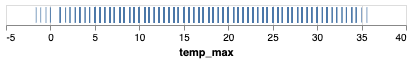

In [7]:
alt.Chart(weather).mark_tick().encode(
    x = 'temp_max:Q'
)

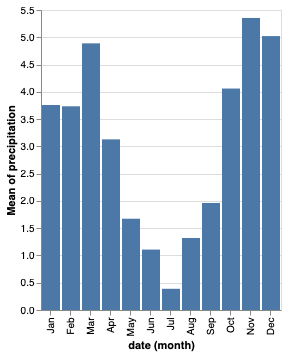

In [8]:
alt.Chart(weather).mark_bar().encode(
    x = alt.X('date:O', timeUnit='month'),
    y = 'mean(precipitation):Q'
)

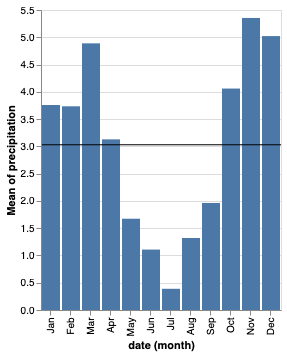

In [9]:
bars = alt.Chart(weather).mark_bar().encode(
    x = alt.X('date:O', timeUnit='month'),
    y = 'mean(precipitation):Q'
)

rule = alt.Chart(weather).mark_rule().encode(
    y = 'mean(precipitation):Q'
)

bars + rule

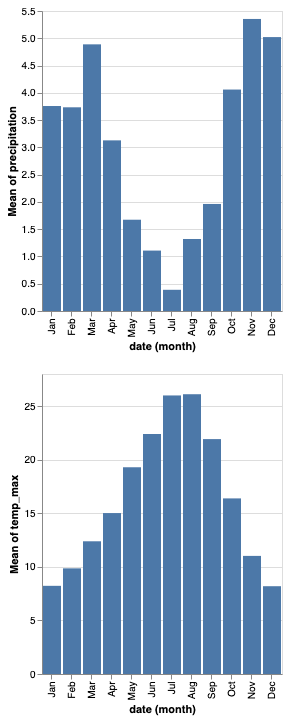

In [10]:
precip = alt.Chart(weather).mark_bar().encode(
    x = alt.X('date:O', timeUnit='month'),
    y = 'mean(precipitation):Q'
)

temp = alt.Chart(weather).mark_bar().encode(
    x = alt.X('date:O', timeUnit='month'),
    y = 'mean(temp_max):Q'
)

precip & temp

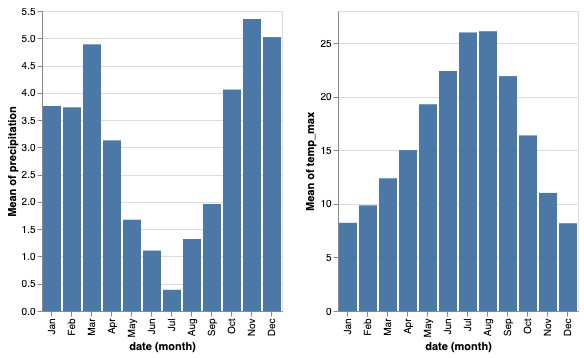

In [11]:
bars = alt.Chart(weather).mark_bar().encode(
    x = alt.X('date:O', timeUnit='month'),
)

bars.encode(y='mean(precipitation):Q') | bars.encode(y='mean(temp_max):Q')

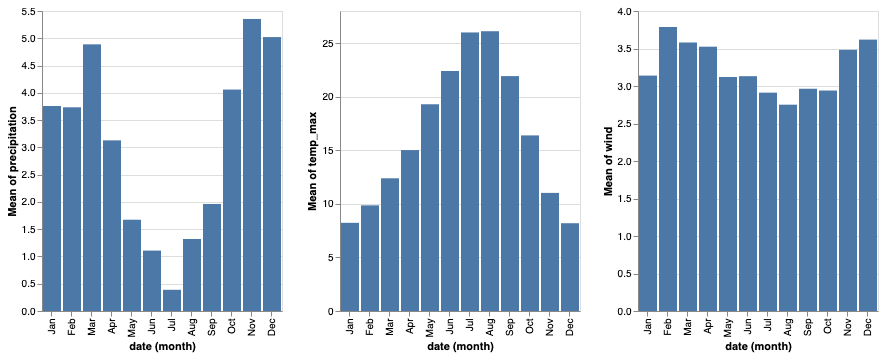

In [12]:
alt.Chart(weather).mark_bar().encode(
    x = alt.X('date:O', timeUnit='month'),
    y = alt.Y(alt.repeat('column'), aggregate='mean', type='quantitative')
).repeat(
    column = ['precipitation', 'temp_max', 'wind']
)